In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
pd.options.display.max_columns = None
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Aus Open = Hard Court
# French Open = Clay Court
# Wim = Grass Court
# US Open = Hard Court
df = pd.read_csv('AusOpen-women-2013.csv')
display(df)

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Serena Williams,Ashleigh Barty,1,1,2.0,0.0,59,20,41,8,6.0,2.0,31,17,5.0,10.0,10.0,11.0,58,6.0,6.0,NaN,NaN,NaN,51,14,49,11,1.0,4.0,5,18,0.0,0.0,2.0,4.0,31,2.0,1.0,NaN,NaN,NaN
1,Vesna Dolonc,Lara Arruabarrena,1,1,2.0,1.0,65,33,35,10,7.0,4.0,7,4,5.0,10.0,NaN,NaN,78,2.0,6.0,6.0,NaN,NaN,62,33,38,10,0.0,3.0,0,3,4.0,7.0,NaN,NaN,74,6.0,2.0,4.0,NaN,NaN
2,Pauline Parmentier,Karolina Pliskova,1,0,0.0,2.0,63,16,37,4,3.0,6.0,3,6,0.0,2.0,NaN,NaN,37,0.0,1.0,NaN,NaN,NaN,60,26,40,7,5.0,0.0,5,0,5.0,14.0,NaN,NaN,64,6.0,6.0,NaN,NaN,NaN
3,Heather Watson,Daniela Hantuchova,1,0,1.0,2.0,61,41,39,19,8.0,3.0,27,45,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,NaN,NaN,68,43,32,10,6.0,2.0,37,44,5.0,13.0,5.0,8.0,102,7.0,3.0,6.0,NaN,NaN
4,Samantha Stosur,Klara Zakopalova,1,1,2.0,0.0,65,28,35,11,6.0,1.0,19,18,7.0,10.0,7.0,10.0,74,6.0,6.0,NaN,NaN,NaN,50,18,50,7,1.0,5.0,27,27,4.0,14.0,10.0,15.0,60,3.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Simona Halep,Dominika Cibulkova,5,0,0.0,2.0,67,13,33,6,2.0,1.0,9,25,1.0,3.0,1.0,4.0,32,3.0,0.0,NaN,NaN,NaN,77,25,23,5,0.0,3.0,17,16,5.0,9.0,3.0,4.0,54,6.0,6.0,NaN,NaN,NaN
123,Agnieszka Radwanska,Victoria Azarenka,5,1,2.0,1.0,59,33,41,16,1.0,1.0,23,15,6.0,16.0,19.0,24.0,94,6.0,5.0,6.0,NaN,NaN,60,26,40,19,0.0,5.0,33,47,2.0,5.0,20.0,34.0,74,1.0,7.0,0.0,NaN,NaN
124,Eugenie Bouchard,Na Li,6,0,0.0,2.0,45,13,55,5,2.0,2.0,10,14,3.0,7.0,4.0,5.0,49,2.0,4.0,NaN,NaN,NaN,61,27,39,11,4.0,5.0,35,23,6.0,10.0,11.0,14.0,71,6.0,6.0,NaN,NaN,NaN
125,Dominika Cibulkova,Agnieszka Radwanska,6,1,2.0,0.0,64,22,36,10,0.0,2.0,21,20,6.0,9.0,12.0,14.0,63,6.0,6.0,NaN,NaN,NaN,68,17,32,2,2.0,2.0,12,24,1.0,9.0,4.0,9.0,40,1.0,2.0,NaN,NaN,NaN


In [4]:
df = df.fillna(0)
data = df.drop(['ST4.1','ST5.1','ST4.2','ST5.2'],axis=1)

features = ['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1',
            'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2']

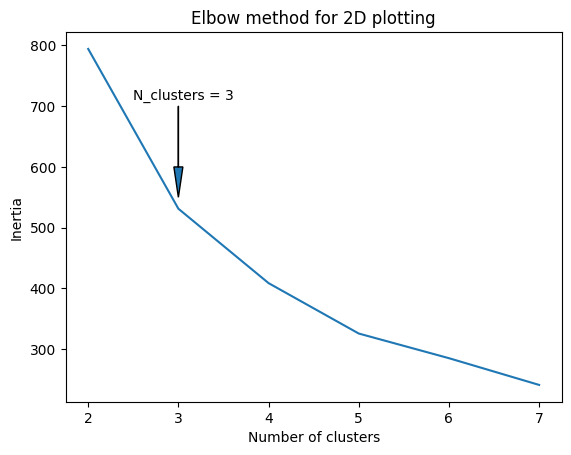

In [31]:
inertias = []
for i in range(2,8):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    pca = PCA(n_components=2)
    pca_data_2d = pca.fit_transform(data_scaled)
    kmeans = KMeans(n_clusters=i, random_state=0,n_init=10)
    kmeans.fit(pca_data_2d)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,8), inertias)
plt.arrow(3,700,0,-100,head_length=50,head_width=0.1)
plt.title("Elbow method for 2D plotting")
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.text(2.5,710,'N_clusters = 3')
plt.show()

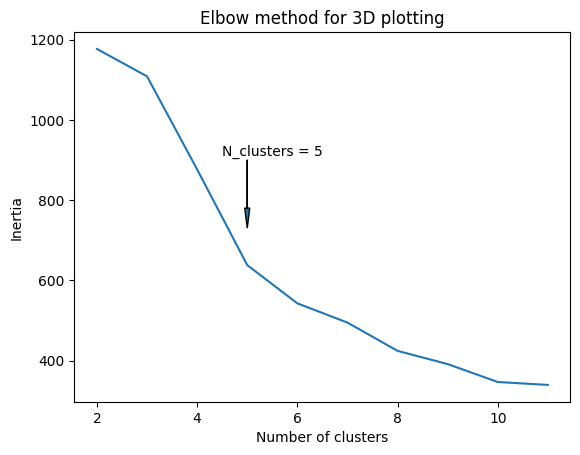

In [30]:
inertias = []
for i in range(2,12):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    pca = PCA(n_components=3)
    pca_data_2d = pca.fit_transform(data_scaled)
    kmeans = KMeans(n_clusters=i, random_state=0,n_init='auto')
    kmeans.fit(pca_data_2d)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2,12), inertias)
plt.arrow(5,900,0,-120,head_length=50,head_width=0.1)
plt.title("Elbow method for 3D plotting")
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.text(4.5,910,'N_clusters = 5')
plt.show()

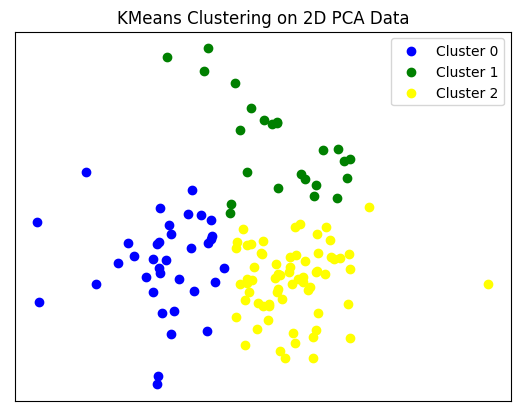

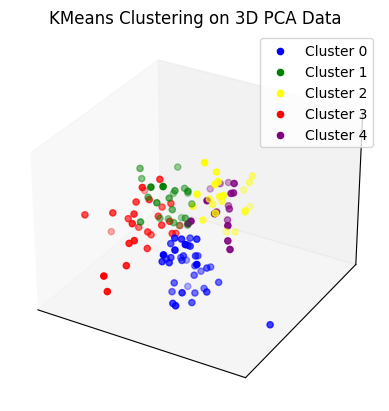

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

pca = PCA(n_components=2)
pca_data_2d = pca.fit_transform(data_scaled)

pca = PCA(n_components=3)
pca_data_3d = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(pca_data_2d)


kmeans_3d = KMeans(n_clusters=5, random_state=0,n_init=10)
kmeans_3d.fit(pca_data_3d)

cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

cluster_labels_3d = kmeans_3d.labels_
data['Cluster_3d'] = cluster_labels_3d


colours = ['blue','green','yellow','red','purple']
for i,cluster in enumerate(sorted(data['Cluster'].unique())):
    plt.scatter(pca_data_2d[data[(data['Cluster']==cluster)].index,0], pca_data_2d[data[(data['Cluster']==cluster)].index,1], c=colours[cluster], label= f'Cluster {cluster}')
plt.title('KMeans Clustering on 2D PCA Data')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,cluster in enumerate(sorted(data['Cluster_3d'].unique())):
    ax.scatter(pca_data_3d[data[(data['Cluster_3d']==cluster)].index,0], pca_data_3d[data[(data['Cluster_3d']==cluster)].index,1],pca_data_3d[data[(data['Cluster_3d']==cluster)].index,2], c=colours[cluster], label= f'Cluster {cluster}')
ax.set_title('KMeans Clustering on 3D PCA Data')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.legend()
plt.show()

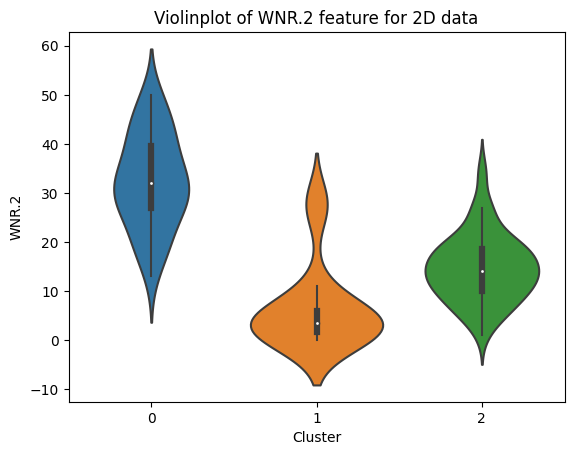

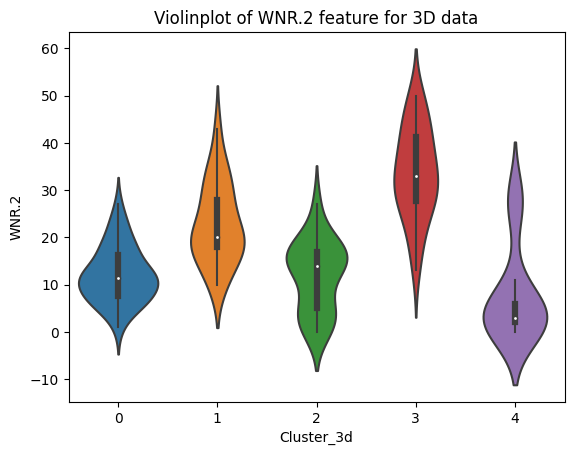

In [40]:
sns.violinplot(x='Cluster', y="WNR.2", data=data, inner="box", quantiles=[0.25, 0.5, 0.75])
plt.title('Violinplot of WNR.2 feature for 2D data')
plt.show()
sns.violinplot(x='Cluster_3d', y="WNR.2", data=data, inner="box", quantiles=[0.25, 0.5, 0.75])
plt.title('Violinplot of WNR.2 feature for 3D data')
plt.show()
